In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
car_data = pd.read_csv('/content/drive/My Drive/Datasets/cars-dataset.csv')

In [4]:
car_data.shape

(398, 8)

In [5]:
car_data.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [7]:
car_data.describe()

,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


Initial observation from info() and describe:
- disp, wt, acc are continous data. wt may contain some outlier.
- cyl, yr are numeric categorical data
- mpg is continous target column
- need to check hp column as it is object as per the pandas and it analysis didn't came up in describe.

In [8]:
# cross checking for null or na values
print("checking na")
print(car_data.isna().sum())
print("\nchecking null")
print(car_data.isnull().sum())

checking na
car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

checking null
car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64


In [9]:
# checking number of differnt cars in column 'car name'
car_data['car name'].nunique() # 305

305

In [10]:
# checking for unique values in hp column
car_data['hp'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [11]:
# Since there is "?" values present in dataset we need to change them
# let's first check how many row have the same so that we can remove them or change them to mean

car_data[car_data['hp'] == "?"]

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


In [12]:
# As we can see there are 6 rows. We can't remove them let's replace them by mean

# First let's replace ? with NAN value
car_data.replace('?',np.NAN,inplace=True)

# converting column type from object to float
car_data['hp'] = car_data['hp'].astype('float64')

# Now let's check the mean for the same
print("Mean for hp is: ", np.mean(car_data['hp']))

#replace it with the mean
car_data['hp'].replace(np.NAN, np.mean(car_data['hp']), inplace=True)

#Since we have replaced all missing values now let's check describe again
car_data.describe().T

Mean for hp is:  104.46938775510205


,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


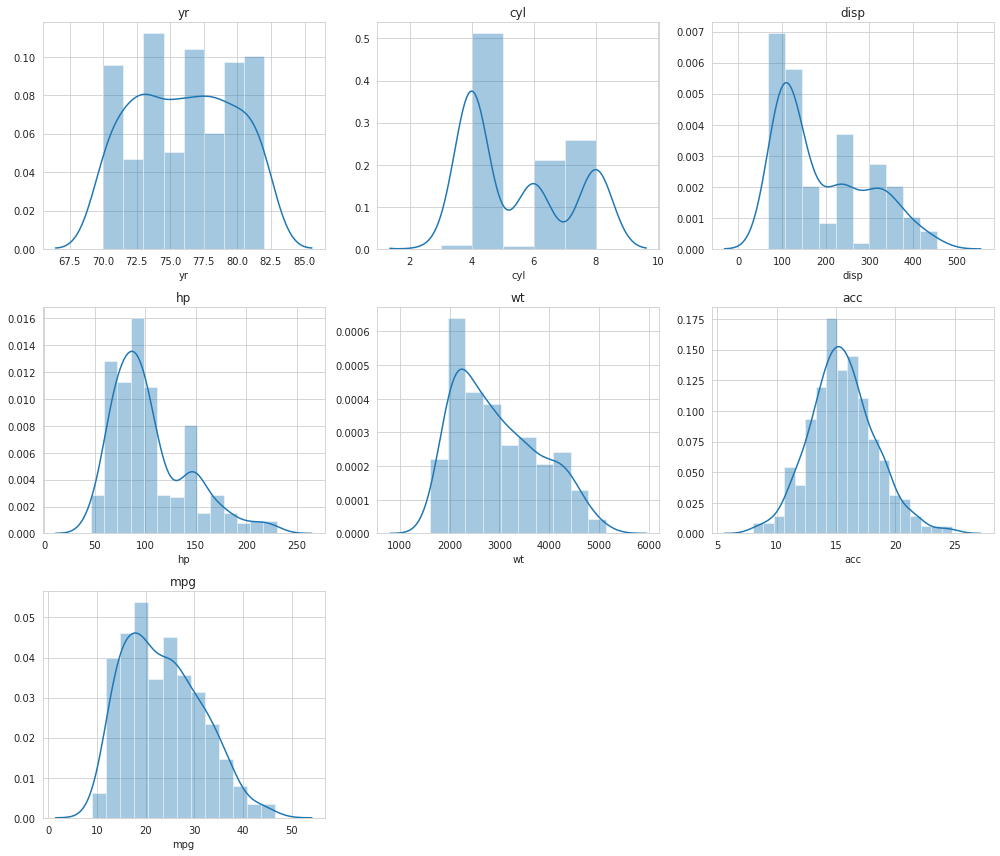

In [13]:
# Univariate analysis
fig = plt.figure(figsize=(14,12))
sns.set_style('whitegrid')

plt.subplot2grid((3,3),(0,0))
plt.title("yr")
sns.distplot(car_data['yr'])

plt.subplot2grid((3,3),(0,1))
plt.title("cyl")
sns.distplot(car_data['cyl'])

plt.subplot2grid((3,3),(0,2))
plt.title("disp")
sns.distplot(car_data['disp'])

plt.subplot2grid((3,3),(1,0))
plt.title("hp")
sns.distplot(car_data['hp'])

plt.subplot2grid((3,3),(1,1))
plt.title("wt")
sns.distplot(car_data['wt'])

plt.subplot2grid((3,3),(1,2))
plt.title("acc")
sns.distplot(car_data['acc'])

plt.subplot2grid((3,3),(2,0))
plt.title("mpg")
sns.distplot(car_data['mpg'])


plt.tight_layout()

Observations:
- mpg and acc is similar to the bell shape structure
- cyl have three peak which may mean there is category
- hp has symmetry 

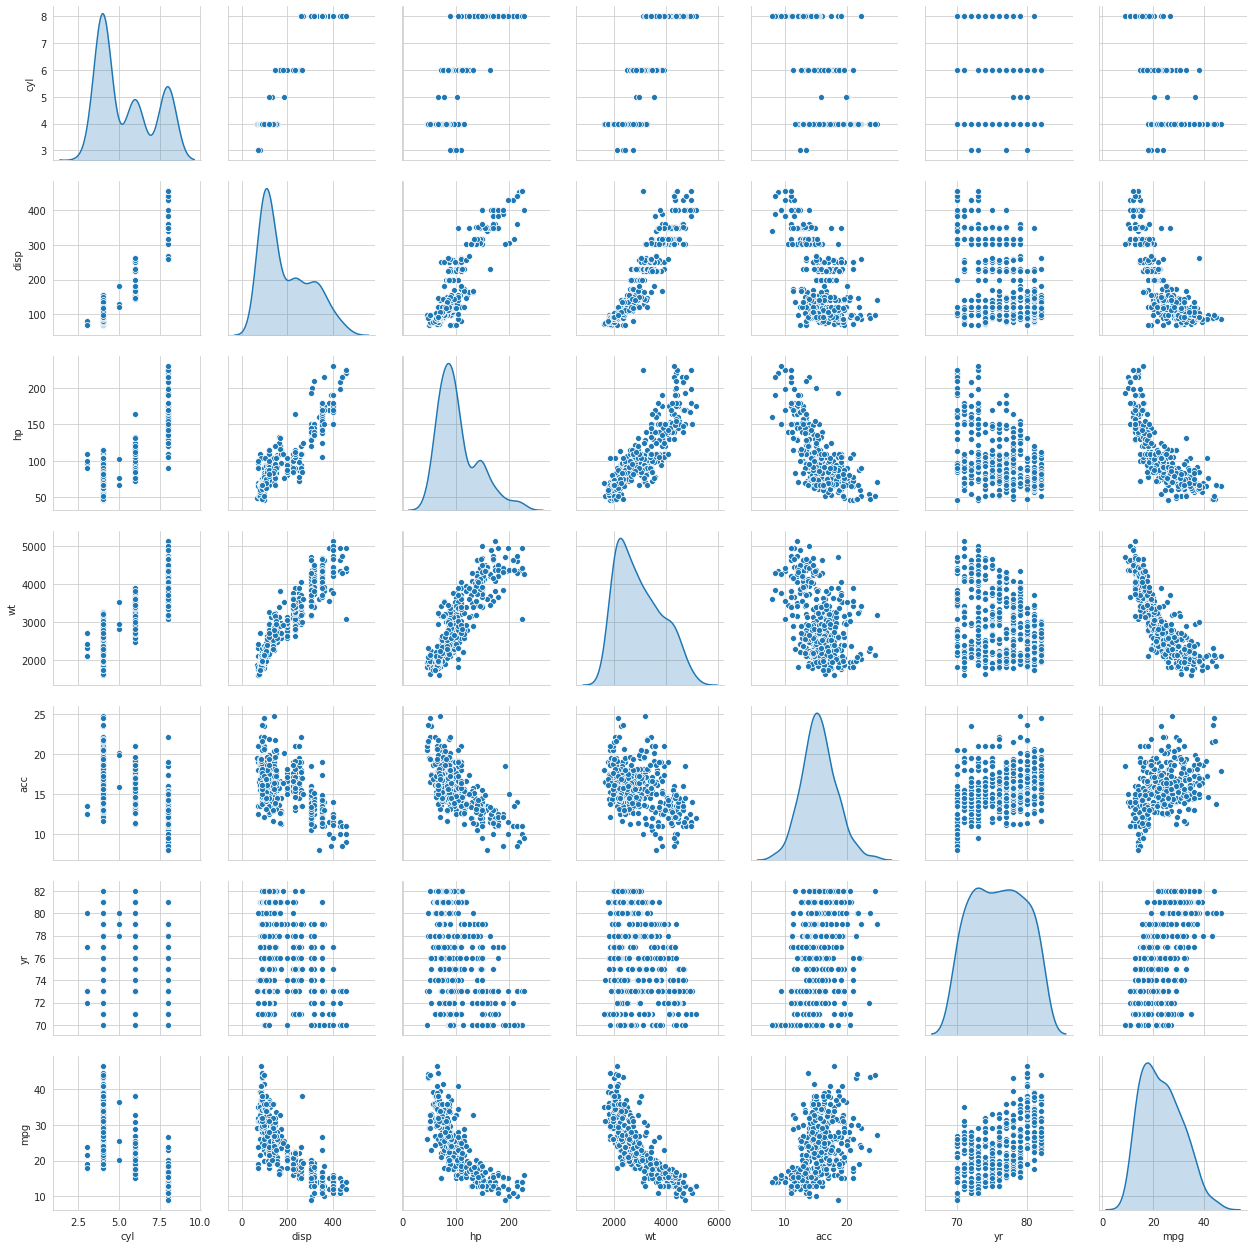

In [15]:
# Bivariate analysis
sns.pairplot(data=car_data, diag_kind='kde', palette='rainbow');

Observations:
- cyl, disp, hp, wt are highly positively correlated.
- acc, yr, mpg are nearly higly negatively correlated.
- 

In [0]:
corr = car_data.corr()

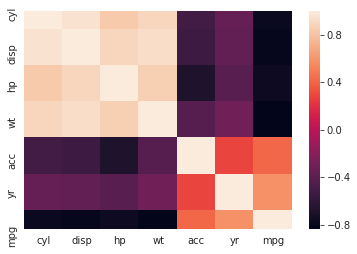

In [17]:
sns.heatmap(corr)

In [58]:
# features
X = car_data.drop(['mpg', 'car name'], axis=1, inplace=False)

# labels
y = car_data[['mpg']]

# printing out shape
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (398, 6)
Shape of y:  (398, 1)


In [59]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# statistics of scaled data
pd.DataFrame(X_scaled).describe()

,0,1,2,3,4,5
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-5.171742e-16,-8.312725e-17,4.287469e-16,-9.902743e-17,8.982206e-17,-8.837152e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.444949e+00,-1.204411e+00,-1.532571e+00,-1.604943e+00,-2.747814e+00,-1.627426e+00
25%,-8.563206e-01,-8.563178e-01,-7.462258e-01,-8.828266e-01,-6.328794e-01,-8.150739e-01
50%,-8.563206e-01,-4.314040e-01,-2.482070e-01,-1.973624e-01,-2.472221e-02,-2.721449e-03
75%,1.498191e+00,6.584879e-01,5.381385e-01,7.538337e-01,5.834349e-01,8.096310e-01
max,1.498191e+00,2.511784e+00,3.290348e+00,2.565185e+00,3.351912e+00,1.621983e+00


In [60]:
# KMeans Clustring Algorithm
from sklearn.cluster import KMeans

# Label, Intertia and Centroid
cluster_range = range(1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, init='k-means++')
  clusters.fit(X_scaled)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2388.000000
1,2,1069.715267
2,3,808.948714
3,4,641.795074
4,5,564.178505
5,6,496.332705
6,7,452.690809
7,8,407.912028
8,9,376.937783


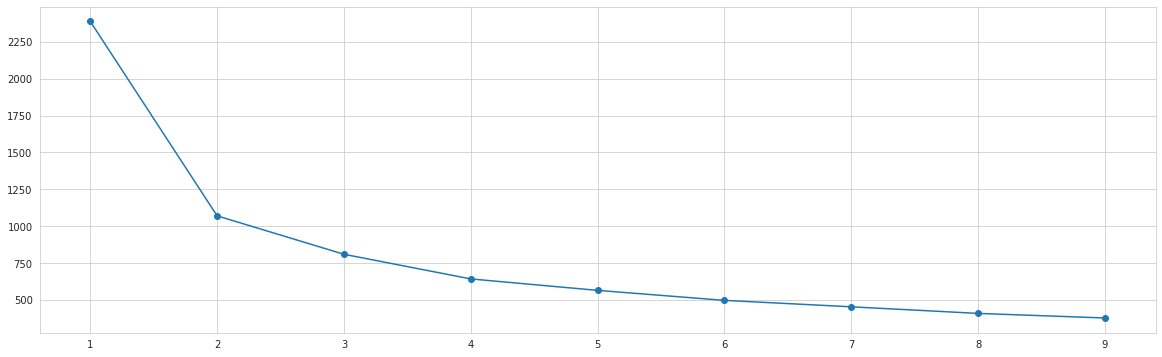

In [61]:
plt.figure(figsize=(20,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")

In [62]:
'''as we can see from the above elbow graph at K=2 we can see the clear elbow'''

#model building with k=2
kMeansModel = KMeans(n_clusters = 2, init='k-means++' )
kMeansModel.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [63]:
labels = kMeansModel.predict(X_scaled)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,

In [64]:
# Get the centroids.... using function cluster_centers_

centroids = kMeansModel.cluster_centers_
centroids

array([[ 1.47555172,  1.44488321,  1.41773652,  1.34012874, -0.9774552 ,
        -0.58074144],
       [-0.52196387, -0.51111515, -0.50151224, -0.47405915,  0.34576646,
         0.20543235]])

In [0]:
# Let us put the raw centroid values into a dataframe under respective columns
centroid_df = pd.DataFrame(centroids, columns = list(X_scaled) )

In [75]:
data_scaled = pd.DataFrame(X_scaled)

car_names = car_data['car name'].values
data_scaled['car name'] = car_names
data_scaled['group'] = labels
data_scaled['mpg'] = car_data['mpg'].values
data_scaled.head()

,0,1,2,3,4,5,car name,group,mpg
0,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426,chevrolet chevelle malibu,0,18.0
1,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426,buick skylark 320,0,15.0
2,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426,plymouth satellite,0,18.0
3,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426,amc rebel sst,0,16.0
4,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426,ford torino,0,17.0


In [68]:
# Count the number of records per group to check the group symmetry 
# Clustering resulting large clusters and small satellite clusters is not good. May need hierarchial clustering in that case

data_scaled["group"].value_counts()

1    294
0    104
Name: group, dtype: int64

In [69]:
data_scaled.groupby('group').count()

,0,1,2,3,4,5,car name
group,,,,,,,
0,104,104,104,104,104,104,104
1,294,294,294,294,294,294,294


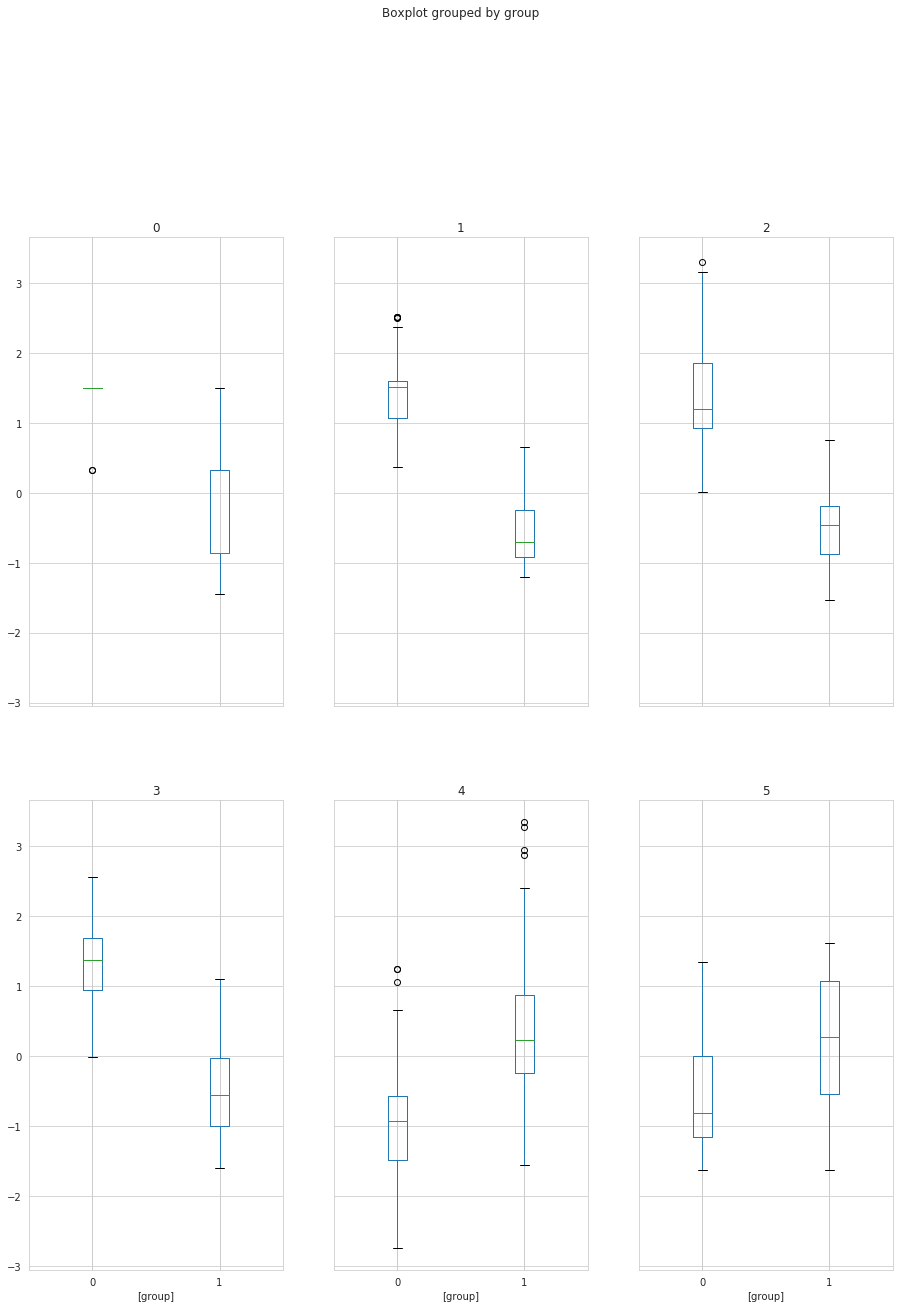

In [71]:
import matplotlib.pylab as plt
data_scaled.boxplot(by = 'group',  layout=(4,3), figsize=(15, 40));

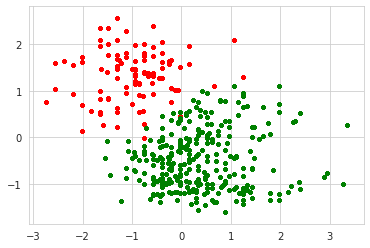

In [72]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in labels:
        points = np.array(data_scaled.loc[data_scaled['group'] == i])
        ax.scatter(points[:, 4], points[:, 3], s=10, c=colors[i])

In [79]:
data_scaled.pop('car name')

df1 = data_scaled[data_scaled.group == 0]
df2 = data_scaled[data_scaled.group == 1]
df3 = data_scaled[data_scaled.group == 2]

X1 = df1.drop('mpg' , axis = 1)
y1 = df1['mpg']
print(X1.shape)
print(y1.shape)
X2 = df2.drop('mpg' , axis = 1)
y2= df2['mpg']
print(X2.shape)
print(y2.shape)

(104, 7)
(104,)
(294, 7)
(294,)


In [80]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

model_score = model.score(X_test, y_test)
print(model_score)

0.6125129865205123


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.30, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

model_score = model.score(X_test, y_test)
print(model_score)

0.6967756384893596


In [0]:
import matplotlib.pylab as plt
data_scaled.scatter (by = 'GROUP',  layout=(4,3), figsize=(15, 40));

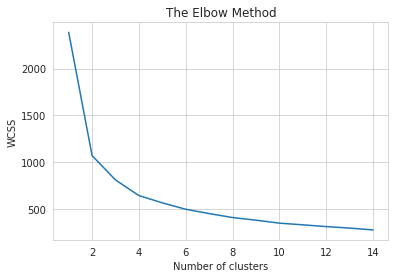

In [0]:
# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0) 


In [0]:
y_kmeans = kmeans.fit_predict(X_scaled)